# Projet Vinasse
## Introduction
Ce notebook a pour objectif de vous présenter notre analyse de données sur des datasets liés au vin.
L'objectif principal de ce projet est donc de réaliser une analyse exploratoire des données. Ce notebook présente chaque étape du processus, tout en fournissant des visualisations détaillées pour faciliter la compréhension des résultats.

## Problématiques
Le prix du vin influence-t-il la qualité du vin ?
Est ce que les pays qui produisent le plus de vin sont les mieux notés ?

## Jeux de données
Afin de réaliser cette analyse, nous avons sélectionné différents datasets :

### winemag.csv

"winemag.csv" qui provient de Kaggle (https://www.kaggle.com/datasets/mysarahmadbhat/wine-tasting).
Ce fichier CSV contient les prix et les notations de nombreux vins à travers le monde.

INFORMATION SUR LES COLONNES :
- **country** : Le pays où le vin est produit
- **description** : Une description du vin
- **designation** : Le nom du vignoble où le raisin qui a fait le vin a été récolté
- **points** : La note donnée au vin par le dégustateur
- **price** : Le prix du vin
- **province** : La région ou l'état où le vin est produit
- **region_1** : La région viticole dans laquelle le vin est produite
- **region_2** : Une région plus spécifique
- **taster_name** : Le nom du dégustateur
- **taster_twitter_handle** : Le compte Twitter du dégustateur
- **title** : Le titre du vin
- **variety** : Le type de raisin utilisé pour produire le vin
- **winery** : Le nom du producteur de vin

### wine-production.csv

"wine-production.csv" qui provient de *"Food and Agriculture Organization of the United Nations (2023)" – avec un traitement majeur par Our World in Data*.
Ce fichier CSV contient les productions de vin par année dans différentes régions.

INFORMATION SUR LES COLONNES :
- **Area** : La région où le vin est produit    
- **Year** : L'année de production
- **Value** : La quantité de vin produite

## Structure du notebook 

[Installation des prérequis](#INSTALLATION-DES-PREREQUIS)

[Nettoyage des données](#NETTOYAGE-DES-DONNEES)  

[Analyse des données](#ANALYSE-DES-DONNEES) 

[Modélisation](#MODELISATION)  

[Conclusion](#CONCLUSION)

# INSTALLATION DES PREREQUIS

In [ ]:
%pip install -r requirements.txt

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NETTOYAGE DES DONNEES


## nettoyage de "winemag.csv"

In [4]:
%matplotlib inline
file_path = "data/winemag.csv"  # Modifier avec le chemin correct
df = pd.read_csv(file_path)

In [5]:
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
df.info()

In [6]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)


Valeurs manquantes par colonne :
 id                           0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [7]:
df.describe()

,id,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [8]:
duplicates = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


## Nettoyage de "wine-prodution"


In [10]:
file_path = "data/wine-production/wine-production.csv"  # Modifier avec le chemin correct
df_prod = pd.read_csv(file_path)

In [11]:
df_prod.head()

,Entity,Code,Year,Wine
0,Africa,NaN,1961,2041926.0
1,Africa,NaN,1962,2232189.0
2,Africa,NaN,1963,2070770.0
3,Africa,NaN,1964,1856545.0
4,Africa,NaN,1965,2389869.0


In [21]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5969 entries, 0 to 5968
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  5969 non-null   object 
 1   Code    3765 non-null   object 
 2   Year    5969 non-null   int64  
 3   Wine    5969 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 186.7+ KB


In [22]:
missing_values = df_prod.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 Entity       0
Code      2204
Year         0
Wine         0
dtype: int64


In [23]:
duplicates = df_prod.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


# ANALYSE DES DONNEES 

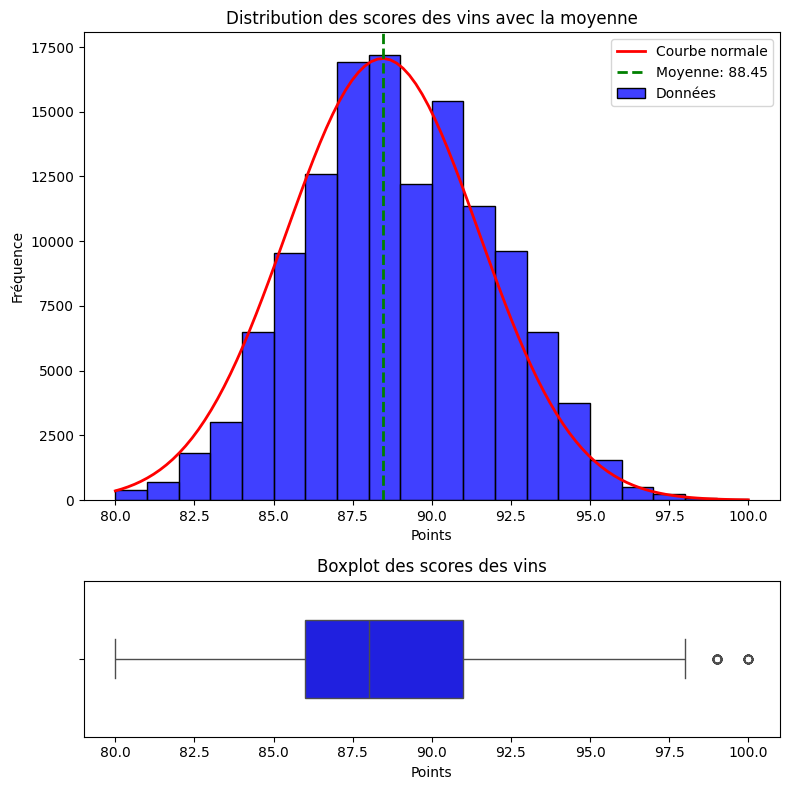

In [30]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la moyenne et de l'écart-type
mean = df["points"].mean()
std = df["points"].std()

# Générer les valeurs pour la courbe normale
x = np.linspace(df["points"].min(), df["points"].max(), 100)
normal_curve = norm.pdf(x, mean, std) * len(df["points"]) * (df["points"].max() - df["points"].min()) / 20  # Adapter à l'échelle de l'histogramme

# Créer une figure avec deux sous-graphiques : un pour l'histogramme et un pour la boîte à moustaches
fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={"height_ratios": [3, 1]})

# Tracer l'histogramme avec la courbe normale sur le premier graphique
sns.histplot(df["points"], bins=20, kde=False, color="blue", label="Données", ax=ax[0])
ax[0].plot(x, normal_curve, color="red", label="Courbe normale", linewidth=2)
ax[0].axvline(mean, color="green", linestyle="--", linewidth=2, label=f"Moyenne: {mean:.2f}")
ax[0].set_title("Distribution des scores des vins avec la moyenne")
ax[0].set_xlabel("Points")
ax[0].set_ylabel("Fréquence")
ax[0].legend()

# Tracer la boîte à moustaches sur le deuxième graphique
sns.boxplot(x=df["points"], ax=ax[1], color="blue", width=0.5)
ax[1].set_title("Boxplot des scores des vins")
ax[1].set_xlabel("Points")

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

Forme de la distribution :

La distribution semble asymétrique à droite (légèrement inclinée), car il y a une concentration plus élevée autour de 87-88, avec une queue qui s'étire vers des scores plus élevés (au-delà de 90).
Cela signifie que la plupart des vins obtiennent des scores moyens (entre 85 et 90), mais il existe quelques vins d'exception avec des scores élevés.

Courbe normale (rouge) :

La courbe normale est superposée pour comparer la distribution réelle avec une distribution théorique normale.
Bien que les données suivent grossièrement une forme normale, elles présentent une légère déviation : la queue droite est plus longue, indiquant une distribution légèrement biaisée.

Moyenne (ligne verte) :

La moyenne des scores est d’environ 88,45 (indiquée dans la légende).
Cela montre que les vins évalués sont majoritairement dans une gamme supérieure de qualité (puisque les scores sont généralement compris entre 80 et 100).
Étalement des données :

L’histogramme montre une variabilité modérée. Les scores sont principalement regroupés autour de la moyenne (entre 85 et 90), mais la queue droite indique qu’il existe des scores plus élevés, probablement attribués à des vins exceptionnels.

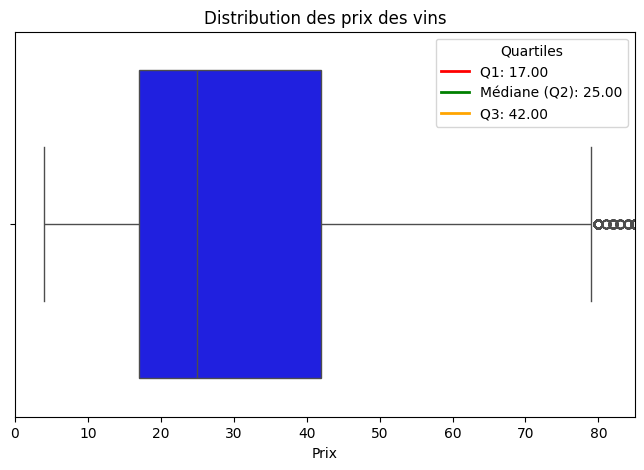

In [26]:
plt.figure(figsize=(8, 5))

# Tracer le boxplot
sns.boxplot(x=df["price"], color="blue")

# Calcul des quartiles
q1 = df["price"].quantile(0.25)
q2 = df["price"].median()  # Équivalent à Q2
q3 = df["price"].quantile(0.75)

# Ajouter la légende
plt.legend(
    handles=[
        plt.Line2D([0], [0], color="red", lw=2, label=f"Q1: {q1:.2f}"),
        plt.Line2D([0], [0], color="green", lw=2, label=f"Médiane (Q2): {q2:.2f}"),
        plt.Line2D([0], [0], color="orange", lw=2, label=f"Q3: {q3:.2f}"),
    ],
    loc="upper right",
    title="Quartiles",
)

# Limite pour exclure les valeurs extrêmes
plt.xlim(0, df["price"].quantile(0.95))

# Ajouter le titre et les labels
plt.title("Distribution des prix des vins")
plt.xlabel("Prix")
plt.show()

Répartition des prix : 
On remarque que la distribution des prix est asymétrique à droite, avec une concentration plus élevée autour de 20-40 USD. La médiane des prix est de 25 USD, ce qui signifie que la moitié des vins coûtent moins de 25 USD.
La moustache étant plus étendue à droite, cela indique qu'il existe des vins plus chers, mais ils sont moins fréquents. Les valeurs extrêmes sont également visibles, avec des prix allant jusqu'à 3300 USD. 


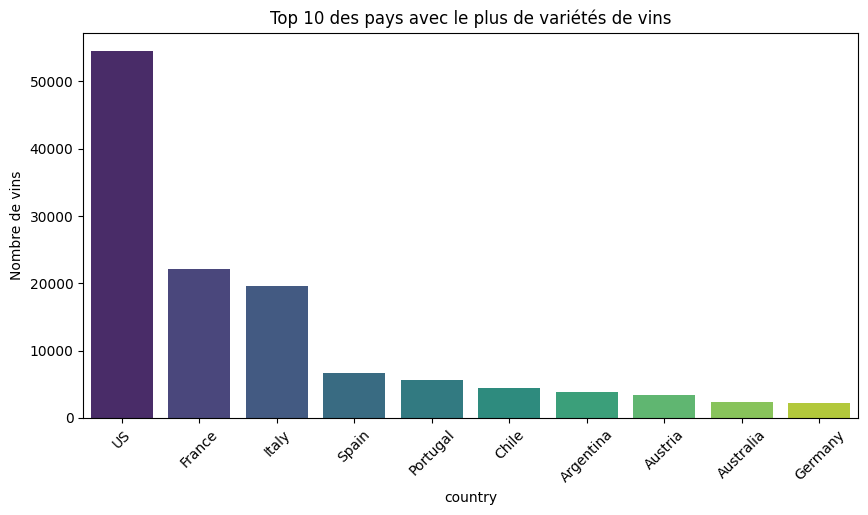

In [27]:
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis", hue=top_countries.index)
plt.title("Top 10 des pays avec le plus de variétés de vins")
plt.ylabel("Nombre de vins")
plt.xticks(rotation=45)
plt.show()

Le diagramme met en évidence la domination des grandes nations viticoles comme la France, l’Italie, l’Espagne et les États-Unis, qui sont les principaux producteurs mondiaux. Si un pays se distingue nettement, cela peut indiquer un biais du dataset ou une forte production et exportation.

On peut observer des disparités : si la décroissance est progressive, cela reflète une répartition naturelle ; une coupure brutale après les premiers pays suggère une sur-représentation des leaders. Lier ces données aux notes et aux prix permettrait d’évaluer si quantité rime avec qualité.

On remarque que les États-Unis sont fortement représentés, ce qui peut indiquer un biais lié aux sources des données, souvent influencées par des critiques anglophones. Cela peut entraîner un déséquilibre dans l’analyse et masquer la diversité des autres pays producteurs. Une analyse plus poussée des points moyens par pays pourrait révéler des tendances intéressantes sur la qualité des vins. 🍷

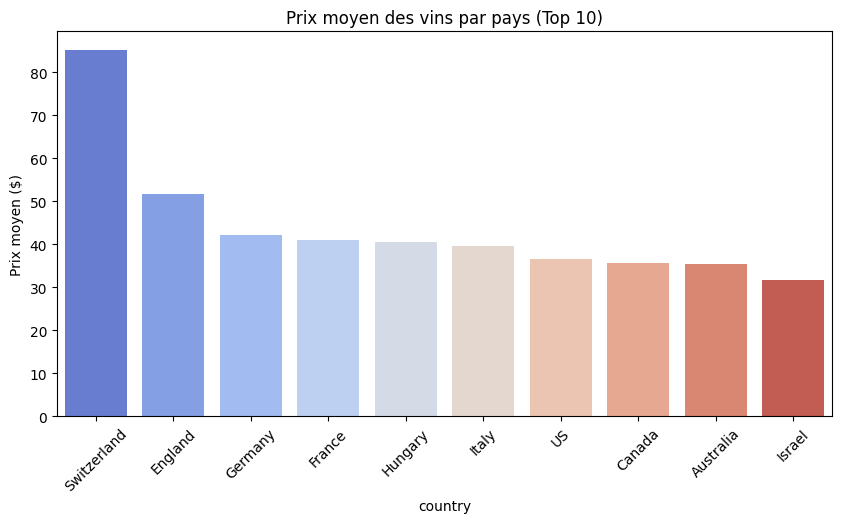

In [16]:
avg_price_country = df.groupby("country")["price"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_country.index, y=avg_price_country.values, palette="coolwarm", hue=avg_price_country.index)
plt.title("Prix moyen des vins par pays (Top 10)")
plt.ylabel("Prix moyen ($)")
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


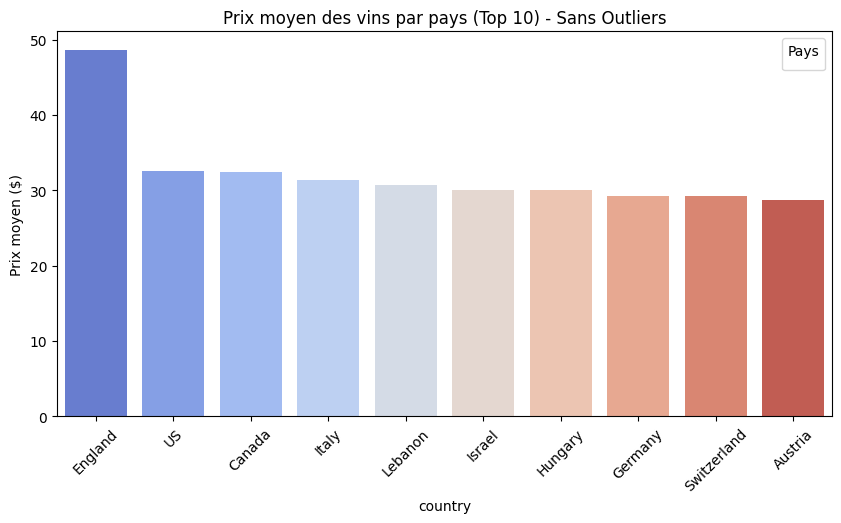

In [28]:
# Détection et suppression des outliers selon le critère de Tukey
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les prix sans les outliers
df_no_outliers = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

# Calcul du prix moyen par pays sans outliers
avg_price_country_no_outliers = (
    df_no_outliers.groupby("country")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Création du graphique
plt.figure(figsize=(10, 5))
sns.barplot(
    x=avg_price_country_no_outliers.index,
    y=avg_price_country_no_outliers.values,
    palette="coolwarm",
    hue=avg_price_country_no_outliers.index,
)
plt.title("Prix moyen des vins par pays (Top 10) - Sans Outliers")
plt.ylabel("Prix moyen ($)")
plt.xticks(rotation=45)
plt.legend(title="Pays")
plt.show()

Ce diagramme montre les 10 pays avec les vins les plus chers en moyenne. On observe que certains pays affichent des prix moyens nettement plus élevés, ce qui peut être dû à une production limitée, une forte réputation viticole ou une demande premium.

Si un pays se démarque largement en tête, cela suggère soit un marché haut de gamme, soit un biais dans le dataset, où seuls les vins les plus prestigieux sont recensés.

Les États-Unis sont probablement bien représentés, ce qui peut fausser l’analyse en raison d’une surreprésentation des vins américains dans le dataset. Ce déséquilibre pourrait masquer d’autres pays proposant aussi des vins haut de gamme mais en plus faible quantité dans les données. Une analyse croisée avec la distribution des points permettrait de vérifier si ces prix élevés sont corrélés à une meilleure qualité.

Dans le cas de la France, on remarque qu'elle n'est plus présente dans le top 10. Cela s'explique probablement par sa forte production de vin, incluant un grand nombre de vins à prix abordables. Cependant, la France est mondialement reconnue pour la qualité de ses vins, et il est donc logique que certains de ses crus figurent parmi les plus chers. Cela explique pourquoi, lorsque les outliers sont exclus, la France disparaît du top 10, les vins à prix excessivement élevés n'étant plus pris en compte dans l'analyse.

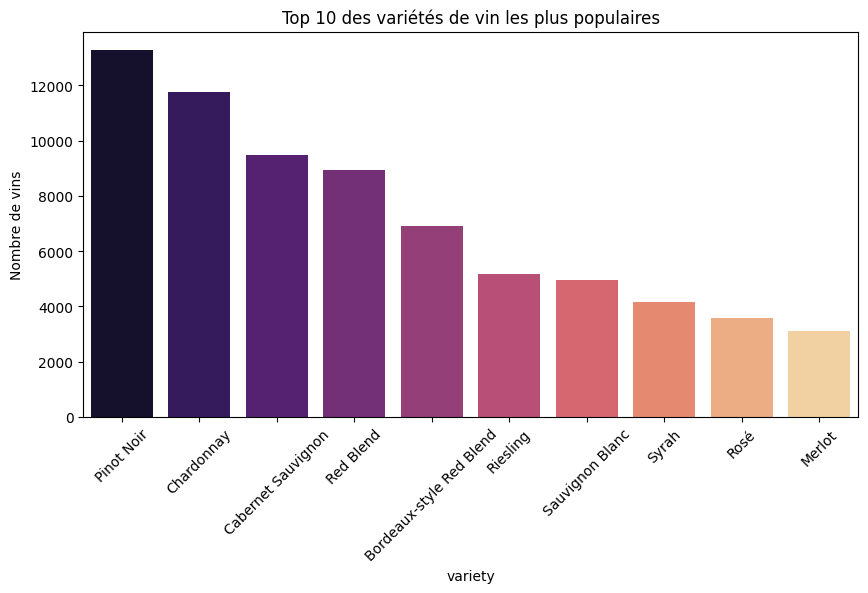

In [19]:
top_varieties = df["variety"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette="magma", hue=top_varieties.index)
plt.title("Top 10 des variétés de cépages les plus populaires")
plt.ylabel("Nombre de vins")
plt.xticks(rotation=45)
plt.show()

Ce diagramme met en évidence les 10 cépages les plus courants dans le dataset. Les variétés en tête, comme le Cabernet Sauvignon, Chardonnay ou Pinot Noir, sont des cépages mondialement connus, largement cultivés et appréciés. Leur popularité peut être due à leur forte production, à la demande du marché ou à leur présence dans les critiques de vin.

Si une ou plusieurs variétés dominent nettement, cela peut indiquer un biais dans la collecte des données, favorisant certaines régions viticoles ou styles de vin. De plus, la forte présence des cépages américains peut refléter la surreprésentation des vins des États-Unis dans le dataset, créant un déséquilibre au détriment de certaines variétés locales d’autres pays. Une analyse plus fine des notes moyennes par cépage permettrait d’évaluer si les variétés les plus populaires sont aussi celles jugées de meilleure qualité. 🍷

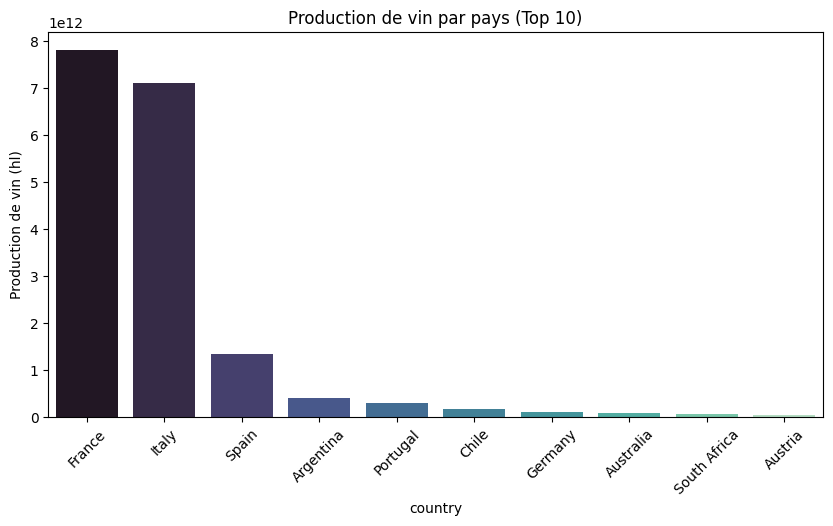

In [24]:
# csv :Entity,Code,Year,Wine
# fais une jointure entre les deux dataframes sur la colonne "Entity"
# fais un graph avec la production de vin en fonction du pays
df_merged = pd.merge(df, df_prod, left_on="country", right_on="Entity")
df_merged = df_merged.groupby("country")["Wine"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=df_merged.index, y=df_merged.values, palette="mako", hue=df_merged.index)
plt.title("Production de vin par pays (Top 10)")
plt.ylabel("Production de vin (hl)")
plt.xticks(rotation=45)
plt.show()



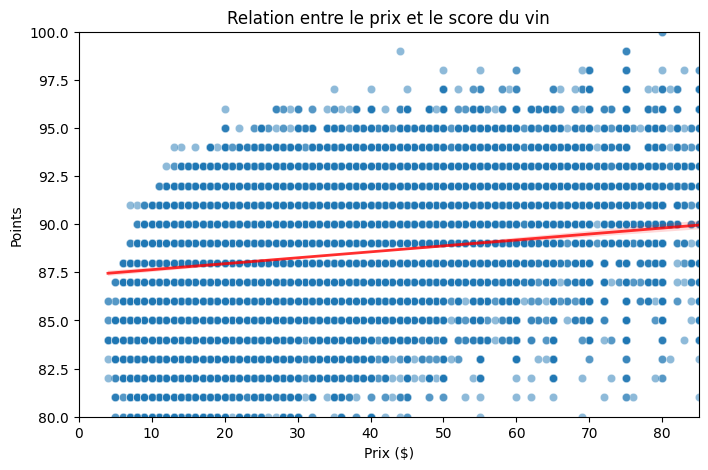

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["price"], y=df["points"], alpha=0.5)
sns.regplot(x=df["price"], y=df["points"], scatter=False, color="red", line_kws={"linewidth": 2, "alpha": 0.8})
plt.xlim(0, df["price"].quantile(0.95))  # Exclure les valeurs extrêmes
plt.ylim(80, 100)
plt.title("Relation entre le prix et le score du vin")
plt.xlabel("Prix ($)")
plt.ylabel("Points")
plt.show()

Analyse de la relation entre les notes et les prix : 

Ce graphique met en évidence la relation entre les notes et les prix des vins. On observe une tendance positive : en général, les vins les mieux notés ont tendance à être plus chers. Cependant, cette relation n'est pas linéaire, car il existe de nombreux vins bien notés à des prix abordables, tandis que certains vins chers ont des notes moyennes.
Ainsi le prix n'est pas forcément un indicateur absolu de qualité, et il est possible de trouver des vins de grande qualité à des prix raisonnables.

In [ ]:
avg_price_country = df.groupby("country")["notation"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_country.index, y=avg_price_country.values, palette="coolwarm", hue=avg_price_country.index)
plt.title("Notation moyenne des vins par pays (Top 10)")
plt.ylabel("Notation moyenne")
plt.xticks(rotation=45)
plt.show()